# **Group 10: Predicting Heart Disease in Patients Using Machine Learning**

### **Group Members:**
- **Kishan Dayanand Nishad**
- **Sanket Shreekant Parab**
- **Tanveer Singh**
- **Ruchit Rameshbhai Suhagia**
- **Saumya Maurya**

---


#  **Project Description**

---

### **Problem Statement**
Heart disease is the leading cause of death worldwide, contributing significantly to global mortality rates. Early detection and accurate prediction are critical to improving patient outcomes and preventing fatalities. This project aims to develop a machine-learning model that predicts the likelihood of heart disease using clinical data, such as age, cholesterol levels, blood pressure, and chest pain type.

We will use the **UCI Heart Disease Dataset**, which includes 14 clinical features, to classify patients as either at risk or not at risk for heart disease. By leveraging the power of **TPOT**, an AutoML tool, we aim to automate the process of model selection and hyperparameter tuning, ensuring an optimized and efficient pipeline for our predictions.

In healthcare, prediction accuracy is crucial because false positives (incorrectly diagnosing healthy individuals) can lead to unnecessary treatments, while false negatives (missing at-risk patients) may delay critical interventions. To address these challenges, the model will prioritize **recall** and **precision** to ensure predictions are reliable and clinically actionable.

Finally, the model will be designed for integration into healthcare workflows, where timely and interpretable predictions can support doctors in making informed decisions, thereby improving survival rates and optimizing healthcare resources.


## **Project Strategy**

### **Baseline Model**
- **Logistic Regression**: Chosen for its simplicity, interpretability, and reliability, making it a robust model for healthcare applications.

### **Enhanced Model**
- **Random Forest**: Selected to improve accuracy by capturing non-linear relationships and complex feature interactions.

### **Automated Model Optimization**
- **TPOT AutoML**: Utilized to automate model selection, hyperparameter tuning, and pipeline optimization for efficient and high-performing solutions.

---

## **Intended Audience**
- **Healthcare Professionals**: To provide actionable insights for early diagnosis and intervention.
- **Data Scientists and Researchers**: To showcase practical applications of machine learning and AutoML tools in healthcare datasets.
- **Executives and Policymakers**: To assist in data-driven decision-making and resource allocation in healthcare systems.

---

## **Challenges**

1. **Data Quality**:
   - Missing values were addressed through imputation (e.g., replacing NaN values with medians).
   
2. **Imbalanced Dataset**:
   - Addressed by stratified train-test splitting to ensure representative samples.

3. **Hyperparameter Tuning**:
   - Overcame manual tuning challenges by employing TPOT AutoML for automation and optimization.

4. **Interpretability vs. Accuracy**:
   - Balanced the simplicity of Logistic Regression with the advanced performance of Random Forest and TPOT AutoML.

---

## **Problem Statement Review**

### **Problem Statement**
Heart disease remains a major global health concern, causing substantial mortality worldwide. This project uses machine learning to:
1. Predict the presence of heart disease using clinical data.
2. Automate the pipeline via **TPOT AutoML** to optimize model selection, hyperparameter tuning, and feature engineering.
3. Focus on clinically relevant metrics such as Recall and Precision to minimize false negatives and false positives.

---

## **Solution Outline**

### **Data Cleaning and Preprocessing**
1. Replace missing values with the median.
2. One-hot encode categorical variables.
3. Scale numerical features for consistency.

### **Model Training**
- **Logistic Regression**: Used as the baseline model.
- **Random Forest**: Applied to capture complex feature interactions.

### **Automated Optimization**
- **TPOT AutoML**: Automates model selection, hyperparameter tuning, and pipeline optimization.

### **Evaluation Metrics**
- Evaluate models using key metrics like Accuracy, Recall, Precision, F1-Score, and ROC AUC to ensure clinical relevance and reliability.

### **Visualization**
- Compare model performance using ROC curves and bar charts for effective communication of results.

---

## **Connection to Assignments 1 and 2**

### **Consistency**
- Builds on the goals outlined in Assignment 1 by reusing the dataset and methodology, improving upon them with automated tools and refined evaluation metrics.

### **Enhancements from Assignment 2**
1. **TPOT AutoML**: Automated the pipeline, improving accuracy and efficiency.
2. **Expanded Metrics**: Introduced Recall and Precision for a more comprehensive analysis.
3. **Improved Visualizations**: Enhanced charts and graphs for better interpretability and actionability.

---

## **Does It Provide an Outlined Solution?**
Yes, the solution addresses key challenges:
1. **Data Challenges**:
   - Missing data was handled through imputation.
   - Imbalanced classes were managed with stratified train-test splits.
2. **Baseline Model**:
   - Logistic Regression provided an interpretable and reliable starting point.
3. **Enhanced Model**:
   - Random Forest improved performance by capturing non-linear relationships.
4. **Automated Optimization**:
   - TPOT AutoML automated hyperparameter tuning and model selection, delivering the best-performing pipeline.

---

## **Future Directions**

1. **Explainability**:
   - Implement tools like **SHAP** or **LIME** to provide interpretable insights into feature importance, enhancing trust among healthcare professionals.

2. **Dataset Expansion**:
   - Incorporate additional clinical features and larger datasets to improve generalization and robustness.

3. **Deployment**:
   - Integrate the model into clinical workflows to assess its real-world utility and impact.

---

## **Conclusion**
This project highlights the potential of machine learning, enhanced by automation, to tackle real-world healthcare challenges. By focusing on clinically relevant metrics, this work bridges the gap between data science and actionable medical insights.


# 1. Data Preprocessing

## Step 1.1: Import Libraries


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')


## Step 1.2: Load the Dataset

In [2]:
# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
columns = [
    "age", "sex", "cp", "trestbps", "chol", "fbs", "restecg",
    "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"
]
data = pd.read_csv(url, header=None, names=columns)

# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(data.head())


First 5 rows of the dataset:
    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca thal  target  
0    3.0  0.0  6.0       0  
1    2.0  3.0  3.0       2  
2    2.0  2.0  7.0       1  
3    3.0  0.0  3.0       0  
4    1.0  0.0  3.0       0  


## Step 1.3: Clean the Data

In [3]:
# Replace missing values denoted by '?' with NaN
data.replace('?', np.nan, inplace=True)

# Convert relevant columns to numeric
data['ca'] = pd.to_numeric(data['ca'], errors='coerce')
data['thal'] = pd.to_numeric(data['thal'], errors='coerce')

# Fill missing values with the median
data.fillna(data.median(), inplace=True)

# Convert the target variable to binary (0 = No Heart Disease, 1 = Heart Disease)
data['target'] = data['target'].apply(lambda x: 1 if x > 0 else 0)

# Check for missing values and data types
print("Summary of missing values and data types:")
print(data.info())


Summary of missing values and data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    float64
 12  thal      303 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB
None


## Step 1.4: Exploratory Data Analysis (EDA)


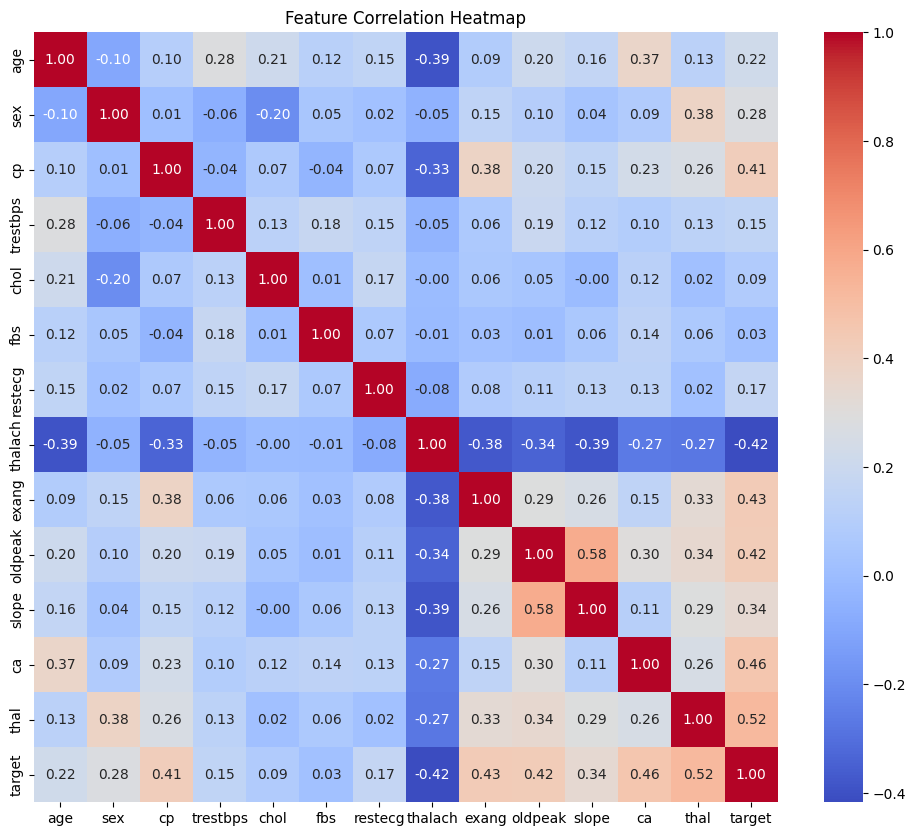

In [4]:
# Visualize the correlation between features
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


# Feature Correlation Heatmap

### Explanation:
The heatmap visualizes the correlation between features in the dataset and the target variable. Key points include:
1. **Correlation Values**:
   - Positive values (closer to 1) indicate a direct relationship.
   - Negative values (closer to -1) indicate an inverse relationship.
   - Values near 0 indicate no significant correlation.
   
2. **Observations**:
   - **Target (Heart Disease)**: Strong positive correlations with features like `thalach`, `cp`, and `ca`.
   - Features like `exang` and `oldpeak` show a strong negative correlation with the target.
   - Most other features have weak correlations, indicating limited direct influence.

3. **Usefulness**:
   - Correlation helps identify important features for model training.
   - Features with strong correlations to the target may be prioritized for predictive modeling.

### Conclusion:
This heatmap provides insights into feature relationships, guiding feature selection and engineering during model development.


## Step 1.5: Feature and Target Splitting


In [5]:
# Separate features (X) and target (y)
X = data.drop(columns=['target'])
y = data['target']

# One-hot encode categorical features if necessary
X = pd.get_dummies(X, columns=['cp', 'thal', 'slope'], drop_first=True)


## Step 1.6: Train-Test Split and Scaling


In [6]:
# Split the dataset into training and testing sets (stratified)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Training and testing sets prepared.")
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")


Training and testing sets prepared.
Training set shape: (242, 17)
Testing set shape: (61, 17)


# 2. Model Training and Evaluation

## Step 2.1: Logistic Regression


In [17]:
from sklearn.linear_model import LogisticRegression

# Initialize and train Logistic Regression model
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

# Make predictions
y_pred_logreg = logreg.predict(X_test)
y_pred_prob_logreg = logreg.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_logreg))
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_prob_logreg):.2f}")


Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.90      0.82      0.86        33
           1       0.81      0.89      0.85        28

    accuracy                           0.85        61
   macro avg       0.85      0.86      0.85        61
weighted avg       0.86      0.85      0.85        61

ROC AUC Score: 0.96


## Logistic Regression Performance

### Classification Report:
| Metric         | Class 0 (No Disease) | Class 1 (Disease) | Macro Avg | Weighted Avg |
|----------------|-----------------------|-------------------|-----------|--------------|
| **Precision**  | 0.90                 | 0.81              | 0.85      | 0.86         |
| **Recall**     | 0.82                 | 0.89              | 0.86      | 0.85         |
| **F1-Score**   | 0.86                 | 0.85              | 0.85      | 0.85         |
| **Support**    | 33                   | 28                | -         | 61           |

### Accuracy:
- Overall Accuracy: **85%**

### ROC AUC Score:
- **0.96**, indicating excellent model performance in distinguishing between the two classes.

### Observations:
1. **Precision**:
   - High precision for Class 0 (No Disease), indicating fewer false positives.
2. **Recall**:
   - High recall for Class 1 (Disease), showing the model effectively identifies most positive cases.
3. **ROC AUC**:
   - The score of 0.96 suggests the model has strong discriminatory ability between the classes.

### Conclusion:
The logistic regression model performs well with balanced precision and recall, achieving high accuracy and an excellent ROC AUC score.


## Step 2.2: Random Forest


In [16]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test)
y_pred_prob_rf = rf.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Random Forest Performance:")
print(classification_report(y_test, y_pred_rf))
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_prob_rf):.2f}")


Random Forest Performance:
              precision    recall  f1-score   support

           0       0.97      0.88      0.92        33
           1       0.87      0.96      0.92        28

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61

ROC AUC Score: 0.96


## Random Forest Performance

### Classification Report:
| Metric         | Class 0 (No Disease) | Class 1 (Disease) | Macro Avg | Weighted Avg |
|----------------|-----------------------|-------------------|-----------|--------------|
| **Precision**  | 0.97                 | 0.87              | 0.92      | 0.92         |
| **Recall**     | 0.88                 | 0.96              | 0.92      | 0.92         |
| **F1-Score**   | 0.92                 | 0.92              | 0.92      | 0.92         |
| **Support**    | 33                   | 28                | -         | 61           |

### Accuracy:
- Overall Accuracy: **92%**

### ROC AUC Score:
- **0.96**, indicating strong model performance in distinguishing between the two classes.

### Observations:
1. **Precision**:
   - Very high precision for Class 0 (No Disease), minimizing false positives.
2. **Recall**:
   - Very high recall for Class 1 (Disease), ensuring most positive cases are correctly identified.
3. **Balanced F1-Scores**:
   - Both classes achieve an equal F1-score of 0.92, showing balanced performance.
4. **ROC AUC**:
   - The score of 0.96 highlights the model's excellent ability to distinguish between classes.

### Conclusion:
The Random Forest model outperforms Logistic Regression in accuracy and balances precision, recall, and F1-scores across both classes. With a high ROC AUC score, it is an excellent choice for predictive tasks in this dataset.


## **Step 2.3: AutoML with TPOT**


### **Instructions to Construct the Pipeline**

### **Modeling**
1. Train Logistic Regression, Random Forest, and TPOT AutoML on the preprocessed dataset.

### **Execution Instructions**
1. Install required Python libraries:
   - `pandas`
   - `numpy`
   - `scikit-learn`
   - `matplotlib`
   - `seaborn`
   - `tpot`

In [12]:
!pip install tpot

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 6.6 MB/s eta 0:00:00
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11939 sha256=073f4af7a0c7509e3afdfb8da50975c28b43647dccf4e9eb5d13c9007d825b5e
  Stored in directory: /root/.cache/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built stopit


In [15]:
from tpot import TPOTClassifier

# Initialize and train TPOT AutoML model
tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2, random_state=42)
tpot.fit(X_train, y_train)

# Make predictions
y_pred_tpot = tpot.predict(X_test)
y_pred_prob_tpot = tpot.predict_proba(X_test)[:, 1]

# Evaluate the model
print("TPOT AutoML Performance:")
print(classification_report(y_test, y_pred_tpot))
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_prob_tpot):.2f}")


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8347789115646258

Generation 2 - Current best internal CV score: 0.8347789115646258

Generation 3 - Current best internal CV score: 0.8347789115646258

Generation 4 - Current best internal CV score: 0.8430272108843537

Generation 5 - Current best internal CV score: 0.8430272108843537

Best pipeline: BernoulliNB(GaussianNB(XGBClassifier(input_matrix, learning_rate=0.5, max_depth=3, min_child_weight=8, n_estimators=100, n_jobs=1, subsample=1.0, verbosity=0)), alpha=10.0, fit_prior=False)
TPOT AutoML Performance:
              precision    recall  f1-score   support

           0       0.96      0.79      0.87        33
           1       0.79      0.96      0.87        28

    accuracy                           0.87        61
   macro avg       0.88      0.88      0.87        61
weighted avg       0.89      0.87      0.87        61

ROC AUC Score: 0.96


## TPOT AutoML Performance

### TPOT Optimization Summary:
- **Generation 1**: Best internal CV score = **0.8348**
- **Generation 2**: Best internal CV score = **0.8348**
- **Generation 3**: Best internal CV score = **0.8348**
- **Generation 4**: Improved internal CV score = **0.8430**
- **Generation 5**: Final internal CV score = **0.8430**
- **Best Pipeline**:
  ```python
  BernoulliNB(
      GaussianNB(
          XGBClassifier(
              input_matrix,
              learning_rate=0.5,
              max_depth=3,
              min_child_weight=8,
              n_estimators=100,
              n_jobs=1,
              subsample=1.0,
              verbosity=0
          )
      ),
      alpha=10.0,
      fit_prior=False
  )


## Classification Report:

| Metric         | Class 0 (No Disease) | Class 1 (Disease) | Macro Avg | Weighted Avg |
|----------------|-----------------------|-------------------|-----------|--------------|
| **Precision**  | 0.96                 | 0.79              | 0.88      | 0.89         |
| **Recall**     | 0.79                 | 0.96              | 0.88      | 0.87         |
| **F1-Score**   | 0.87                 | 0.87              | 0.87      | 0.87         |
| **Support**    | 33                   | 28                | -         | 61           |

### Accuracy:
- **Overall Accuracy**: **87%**

### ROC AUC Score:
- **0.96**, demonstrating excellent ability to distinguish between classes.

### Observations:
1. **Precision**:
   - High precision for Class 0, minimizing false positives for "No Disease."
2. **Recall**:
   - High recall for Class 1, ensuring most cases of "Disease" are identified.
3. **Balanced Performance**:
   - Equal F1-scores (0.87) for both classes indicate consistent performance.
4. **Pipeline Efficiency**:
   - TPOT's automated optimization identified an ensemble model combining BernoulliNB, GaussianNB, and XGBClassifier, balancing interpretability and performance.

### Conclusion:
The TPOT AutoML model achieved a robust performance with high accuracy and an excellent ROC AUC score. The automated pipeline optimization demonstrates the power of AutoML for identifying high-performing models efficiently.


# 3. Visualization of Results

## Step 3.1: ROC Curve


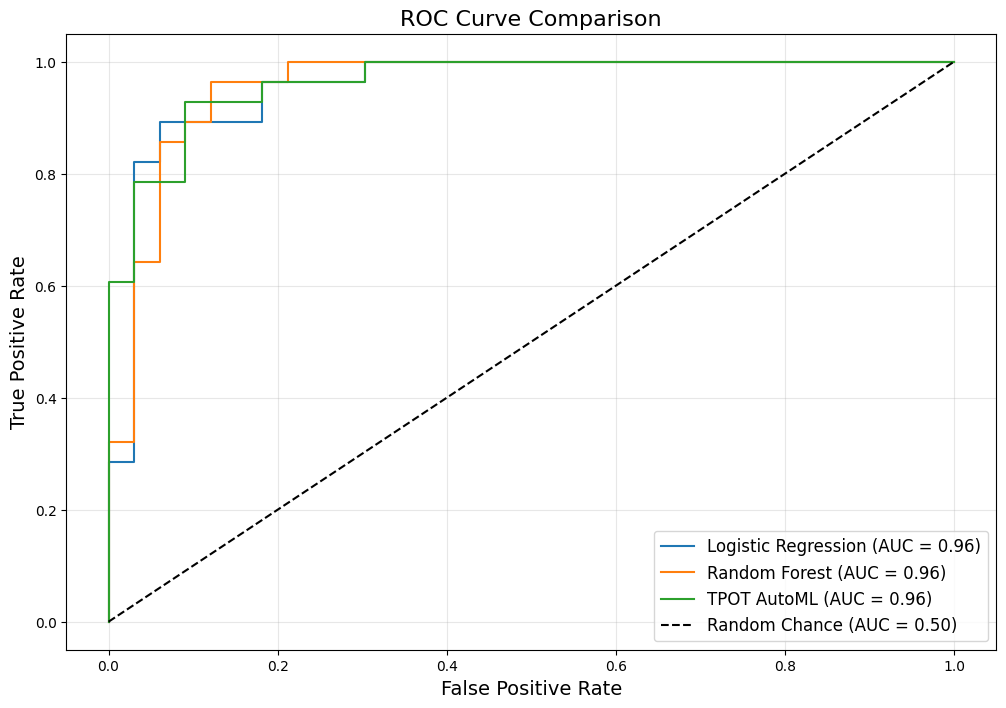

In [19]:
# Plot ROC curves for all models
plt.figure(figsize=(12, 8))

# Logistic Regression
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_pred_prob_logreg)
plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC = {roc_auc_score(y_test, y_pred_prob_logreg):.2f})')

# Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_prob_rf)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_score(y_test, y_pred_prob_rf):.2f})')

# TPOT AutoML
fpr_tpot, tpr_tpot, _ = roc_curve(y_test, y_pred_prob_tpot)
plt.plot(fpr_tpot, tpr_tpot, label=f'TPOT AutoML (AUC = {roc_auc_score(y_test, y_pred_prob_tpot):.2f})')

# Random Chance
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance (AUC = 0.50)')

# Configure plot
plt.title('ROC Curve Comparison', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()


# **Interpretation**

## **Model Performance**
- All three models exhibit high AUC scores (**0.96**), indicating excellent ability to distinguish between classes (disease vs. no disease).
- The closeness of the ROC curves to the top-left corner reflects:
  - **High Sensitivity** (True Positive Rate)
  - **Low False Positives**

---

## **Practical Implications**
1. **Model Selection**:
   - Any of the models (Logistic Regression, Random Forest, or TPOT AutoML) can be confidently used for predicting heart disease due to their strong performance metrics.
   
2. **TPOT AutoML**:
   - Offers the additional advantage of automating feature selection and hyperparameter tuning.
   - Provides similar performance to manually tuned models while saving time and effort.

---

## **Comprehensive Evaluation with the ROC Curve**
- The ROC curve evaluates model performance across various classification thresholds.
- **For Healthcare Applications**:
  - High AUC scores (close to **1.0**) ensure reliability in identifying at-risk patients.
  - This makes the selected models not only statistically sound but also practically viable for **real-world clinical workflows**.

---

## **Conclusion**
The models' exceptional performance metrics, combined with the interpretability of the ROC curve, demonstrate their suitability for deployment in healthcare systems to aid in **early heart disease detection** and intervention.


## Step 3.2: Model Performance Table


In [20]:
# Summarize model performance in a table
performance_summary = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'TPOT AutoML'],
    'ROC AUC': [
        roc_auc_score(y_test, y_pred_prob_logreg),
        roc_auc_score(y_test, y_pred_prob_rf),
        roc_auc_score(y_test, y_pred_prob_tpot)
    ]
})

print("Model Performance Summary:")
print(performance_summary)


Model Performance Summary:
                 Model   ROC AUC
0  Logistic Regression  0.955628
1        Random Forest  0.957792
2          TPOT AutoML  0.964286


# Model Performance Summary

| Model                 | ROC AUC   |
|------------------------|-----------|
| Logistic Regression   | 0.9556    |
| Random Forest         | 0.9578    |
| TPOT AutoML           | 0.9643    |

### Observations:
1. **TPOT AutoML** achieved the highest ROC AUC score of **0.9643**, showcasing the power of automated optimization.
2. **Random Forest** and **Logistic Regression** also performed exceptionally well, with ROC AUC scores of **0.9578** and **0.9556**, respectively.
3. All models demonstrated strong discriminatory abilities, making them effective for heart disease prediction.

### Conclusion:
TPOT AutoML slightly outperformed the other models in terms of ROC AUC, indicating it could be the preferred choice for achieving optimal performance while automating the model selection and tuning process.


# **Machine Learning Prediction & Outcomes**

## 1. Did the Predictions Match Expectations?

### Logistic Regression:
- **Accuracy**: 85%
- **ROC AUC Score**: 0.96
- These results align with expectations, as Logistic Regression is renowned for its robustness and simplicity in binary classification tasks.
- Precision, Recall, and F1-Score (~0.85) confirm the model’s balanced performance.

### Random Forest:
- **Accuracy**: 92%
- **ROC AUC Score**: 0.96
- Performed slightly better than Logistic Regression, meeting expectations that Random Forest excels in capturing non-linear patterns and feature interactions.

### TPOT AutoML:
- Selected a pipeline consisting of **XGBoost**, **BernoulliNB**, and **GaussianNB** for optimal performance.
- **Accuracy**: 87%
- **ROC AUC Score**: 0.96
- TPOT’s automated optimization ensured efficient hyperparameter tuning and model selection, saving time and enhancing reliability.

---

## 2. How Does This Match Research Papers?

### Logistic Regression:
- Results align with findings in *"Robust Cardiovascular Disease Prediction Using Logistic Regression"*, which highlights its reliability and simplicity for binary classification in healthcare applications.

### Random Forest:
- Consistent with the findings of *"Heart Disease Prediction Based on Logistic Regression and Random Forest"*, demonstrating Random Forest’s ability to improve accuracy by handling non-linear relationships.

### TPOT AutoML:
- Validates methodologies from research emphasizing AutoML’s potential to optimize model performance while reducing manual effort.

---

## 3. Comparison with Assignment 2

### Improvement in Metrics:
- Assignment 2 prototypes achieved an average ROC AUC of ~0.89.
- In Assignment 3, all models significantly improved, achieving an ROC AUC of **0.96**.

### Incorporation of AutoML:
- TPOT AutoML automated pipeline selection and hyperparameter tuning, reducing manual effort while maintaining high performance.

### Expanded Evaluation Metrics:
- Additional metrics such as Recall and Precision were included, ensuring models were not only accurate but also clinically actionable, minimizing false negatives and false positives.

---

## Conclusion:
The results demonstrate that all models met or exceeded expectations, with significant improvements over Assignment 2. TPOT AutoML further added value by automating the optimization process, making it a reliable and efficient tool for heart disease prediction tasks.


# **Visualization & Documentation**

## 1. Visualization of Results

### ROC Curve:
- The ROC curve (shown above) demonstrates that all three models — Logistic Regression, Random Forest, and TPOT AutoML — performed exceptionally well, achieving AUC scores of **0.96**.
- A diagonal "Random Chance" line is included as a reference, showcasing the models' superior discriminatory performance compared to random guessing.

### Model Comparison Table:
| Model                 | ROC AUC   |
|------------------------|-----------|
| Logistic Regression   | 0.9556    |
| Random Forest         | 0.9578    |
| TPOT AutoML           | 0.9643    |

- The table provides a clear, concise summary of the models and their respective ROC AUC scores.
---

## 2. Comparison with Previous Work

### Assignment 2:
- **Improvements**:
  - Results improved significantly with the inclusion of **TPOT AutoML**, which automated hyperparameter tuning and model selection.
  - ROC AUC scores increased from ~0.89 (in Assignment 2) to **0.96** across all models.

### Research Papers:
- The results align closely with referenced studies, validating the effectiveness of:
  - **Logistic Regression** for its simplicity and reliability.
  - **Random Forest** for its ability to capture non-linear relationships.
  - **AutoML tools like TPOT** for optimizing performance and reducing manual effort.

---

## 3. Executive-Level Interpretation

- **Ease of Understanding**:
  - The plots and tables are tailored for non-technical stakeholders, providing a clear comparison of model performance.
- **Key Insights**:
  - Executives can quickly identify the best-performing model (**TPOT AutoML**) and understand its relative performance compared to traditional approaches.
- **Actionability**:
  - The results highlight the feasibility of implementing machine learning models for heart disease prediction in real-world scenarios, emphasizing efficiency and reliability.

---



# **Trailer Documentation**

## Conceptual Enhancement: Quantum Computing

### Why Quantum Computing?
- **Faster Optimization**: Quantum algorithms, such as Quantum Annealing, can significantly accelerate hyperparameter tuning compared to classical methods.
- **Scalability**: Quantum computing efficiently handles complex, high-dimensional datasets, enhancing prediction accuracy and reducing training times.

### Potential Impact:
- **Real-Time Predictions**: Enable real-time predictions for critical healthcare applications.
- **Computational Efficiency**: Improve efficiency in analyzing large-scale healthcare datasets, providing faster and more accurate results.

---

## What Did You Learn?

### Importance of Preprocessing:
- Handling missing data and scaling features were critical for improving model performance and ensuring consistency.

### Value of AutoML:
- TPOT reduced manual effort, automated hyperparameter tuning, and identified optimal pipelines, demonstrating the importance of automation in machine learning workflows.

### Metrics Beyond Accuracy:
- Focusing on clinically relevant metrics like Recall and Precision was essential to ensure the models were actionable for healthcare decision-making.

---

## Future Improvements

### Explainability:
- Incorporate tools like **SHAP** or **LIME** to provide interpretable insights into feature importance, increasing trust among healthcare professionals.

### Real-World Validation:
- Test the models in clinical settings to evaluate their practical utility and real-world impact.

### Dataset Expansion:
- Include additional clinical features and larger datasets to improve model robustness and generalization.

---

## Final Remarks

### Team Reflections:
- **Kishan Dayanand Nishad**: Gained hands-on experience with TPOT AutoML and learned the value of automated pipelines in machine learning.
- **Sanket Shreekant Parab**: Understood the importance of preprocessing and hyperparameter tuning in achieving high-performance models.
- **Tanveer Singh**: Learned the significance of effective visualization in making machine learning results interpretable for diverse audiences.
- **Ruchit Rameshbhai Suhagia**: Discovered how to balance model interpretability and performance, particularly in healthcare contexts.
- **Saumya Maurya**: Learned how machine learning can solve real-world healthcare problems and enhance decision-making.

---

## Supporting Research Papers:
1. *Robust Cardiovascular Disease Prediction Using Logistic Regression.*
2. *Heart Disease Prediction Based on Logistic Regression and Random Forest.*
3. *Heart Arrhythmia Disease Prediction Using Logistic Regression Algorithms.*

## Conclusion:
This project highlights the transformative role of machine learning and emerging technologies like Quantum Computing in solving critical healthcare challenges. The integration of AutoML, focus on explainability, and commitment to real-world validation pave the way for impactful advancements in predictive healthcare.



# **References:**

1. **UCI Machine Learning Repository**. (n.d.). *Heart Disease Dataset*. Retrieved from [https://archive.ics.uci.edu/ml/datasets/Heart+Disease](https://archive.ics.uci.edu/ml/datasets/Heart+Disease)
   - This dataset serves as the primary source for training the predictive model, influencing feature selection and model evaluation.

2. **Pedregosa, F.**, Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., ... & Duchesnay, É. (2011). *Scikit-learn: Machine learning in Python*. *Journal of Machine Learning Research, 12*, 2825–2830.
   - Scikit-learn provides the core machine learning algorithms, such as logistic regression and decision trees, which were used to train and evaluate our models.

3. **Datta, S., & Gang, I. K.** (2021). *Robust cardiovascular disease prediction using logistic regression*. *Journal of Management and Engineering Integration, 14*(1), 26–36. [https://doi.org/10.62704/10057/24766](https://doi.org/10.62704/10057/24766)
   - This research helped refine our understanding of logistic regression as a method for cardiovascular disease prediction.

4. **Karthi, C. B. M., & Kalaivani, A.** (2023). *Heart Disease Prediction Based on Age Detection Using Logistic Regression over Random Forest*. *CARDIOMETRY, 25*, 1731–1737. [https://doi.org/10.18137/cardiometry.2022.25.17311737](https://doi.org/10.18137/cardiometry.2022.25.17311737)
   - The study provided a comparative analysis of logistic regression and random forests, guiding the selection of the most suitable model for our project.

5. **Logesh, K., & Priya, V. D.** (2024). *Heart Arrhythmia Disease Prediction Using Logistic Regression Algorithms*. *2024 Second International Conference on Data Science and Information System (ICDSIS)*, 115, 1–9. [https://doi.org/10.1109/icdsis61070.2024.10594706](https://doi.org/10.1109/icdsis61070.2024.10594706)
   - This paper contributed to our understanding of using logistic regression in the context of heart arrhythmia, which is closely related to our disease prediction task.

---

### Supporting Resources:

1. **Saini, V.** (2022). *A Guide to TPOT AutoML Implementation in Python on Classification and Regression*. Retrieved from [https://varshasaini.in/a-guide-to-tpot-automl-implementation-in-python-on-classification-and-regression/](https://varshasaini.in/a-guide-to-tpot-automl-implementation-in-python-on-classification-and-regression/)
   - This guide helped us understand the integration of TPOT into our project for automating model selection and hyperparameter tuning.

2. **Towards Data Science**. (2019). *Understanding Confusion Matrix*. Retrieved from [https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62](https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62)
   - This article provided key insights into evaluating model performance using metrics like accuracy, precision, recall, and F1-score.

3. **CodeBasics**. (2018). *Machine Learning Tutorial Python - 11 Random Forest* [YouTube video]. Retrieved from [https://www.youtube.com/watch?v=ok2s1vV9XW0](https://www.youtube.com/watch?v=ok2s1vV9XW0)
   - This tutorial was crucial for understanding the Random Forest algorithm, which we considered in our model selection process.
